In [2]:
#Debugging 01-09-2023
#Parece-me que Maxwell-Boltzmann funcionou

#imports
import math
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle
import numpy as np

In [3]:
#constantes
FPS = 60
dt = 1/FPS
altura_caixa = 950
largura_caixa = 950
num_particulas = 100

In [4]:
#classe particula
class Particula:
    def __init__(self, massa, raio, vel_x, vel_y, x, y, cor):
        self.massa = float(massa) #definir propriedades
        self.raio = float(raio)
        self.vel_x = float(vel_x)
        self.vel_y = float(vel_y)
        self.x = float(x)
        self.y = float(y)
        self.cor = cor
        
        #deslocamento intrinseco
    def deslocar(self):
        self.x += self.vel_x * dt 
        self.y += self.vel_y * dt
        
        #checa colisao parede
        if self.x < self.raio or self.x > largura_caixa - self.raio:
            self.vel_x *= -1
        if self.y < self.raio or self.y > altura_caixa - self.raio:
            self.vel_y *= -1


In [5]:
def check_collision(p1, p2):
    #checa a colisao por distancia euclidiana e soma dos raios
    distance = math.sqrt((p2.x - p1.x)**2 + (p2.y - p1.y)**2)
    if distance <= p1.raio + p2.raio: #checa
        return True #colide
    else:
        return False #nao colide

In [6]:
def resolve_collision(p1, p2):
    #pos colisao
    x1 = np.array([p1.x, p1.y]) #transforma as coordenadas em vetores
    x2 = np.array([p2.x, p2.y])

    v1 = np.array([p1.vel_x, p1.vel_y]) #transforma as velocidades em vetores
    v2 = np.array([p2.vel_x, p2.vel_y])

    #operacao vetorial
    new_v1 = v1 - (((2 * p2.massa) / (p1.massa + p2.massa)) * ((np.dot((v1 - v2), (x1 - x2))) / ((np.linalg.norm(x1 - x2))**2)) * (x1 - x2))
    new_v2 = v2 - (((2 * p1.massa) / (p1.massa + p2.massa)) * ((np.dot((v2 - v1), (x2 - x1))) / ((np.linalg.norm(x2 - x1))**2)) * (x2 - x1))

    #substitui velocidades na instancia
    p1.vel_x = new_v1[0]
    p1.vel_y = new_v1[1]
    p2.vel_x = new_v2[0]
    p2.vel_y = new_v2[1]

In [7]:
def create_particle_circles(particles, ax):
    #cria os circulos (figura) em matplot
    circles = []
    for particle_instance in particles.values():
        circle = Circle((particle_instance.x, particle_instance.y), radius=particle_instance.raio, color=particle_instance.cor)
        ax.add_patch(circle) #edgecolor
        circles.append(circle) #armazena os circulos
    return circles

In [8]:
def gerar_particula(n_particulas, largura_caixa, altura_caixa):
    particulas = {} #armazena em um dict
    for particle_index in range(1, n_particulas + 1):
        massa = 10 #propriedades
        raio = 5
        vel_x = random.uniform(-50, 50)
        vel_y = random.uniform(-50, 50)
        x = random.uniform(raio, largura_caixa - raio)
        y = random.uniform(raio, altura_caixa - raio)
        cor = "#%02x%02x%02x" % (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        nome_particula = f"particula_{particle_index}" #cria 'nomes' diferentes para as particulas
        particle_instance = Particula(massa, raio, vel_x, vel_y, x, y, cor) #instancia a Classe particula
        particulas[nome_particula] = particle_instance #armazena no dict
    return particulas


In [9]:
def animate(frame, particles, circles):
    #'anima' as particulas utilizando matplot
    for particle_name, particle_instance in particles.items(): #seleciona particula 1
        for other_particle_name, other_particle_instance in particles.items(): #seleciona particula 2
            if particle_name != other_particle_name and check_collision(particle_instance, other_particle_instance):
                #se p_1 ! p_2 e colisao == True
                resolve_collision(particle_instance, other_particle_instance) #executa o pos colisao
        
        #importante! para colidir ele verifica p_1 com todas e depois move. nao fazer isso buga a colisao
        particle_instance.deslocar()
    
    for circle, particle_instance in zip(circles, particles.values()):
        circle.set_center((particle_instance.x, particle_instance.y))  # set_center == atualiza posicao


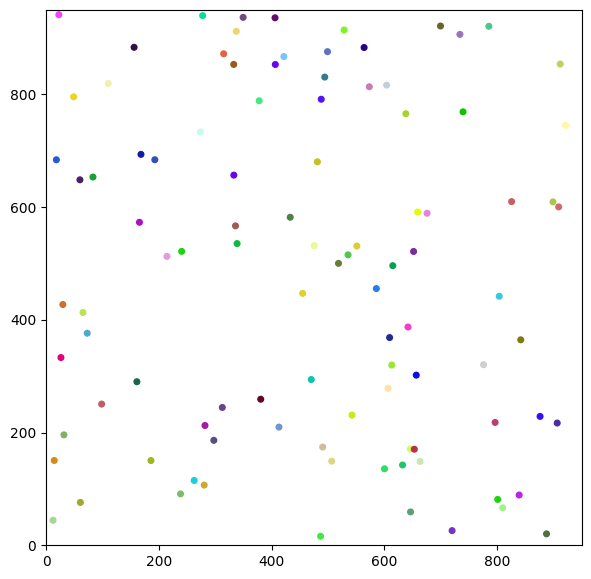

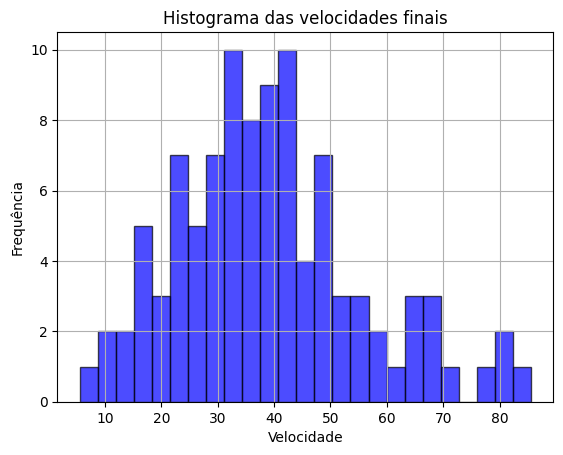

In [10]:
def main():
    particles = gerar_particula(num_particulas, largura_caixa, altura_caixa)
    final_speeds = []  #armazena as vel. finais para plot Maxwell-Boltzmann

    fig, ax = plt.subplots(figsize=(6, 6)) #cria caixa
    ax.set_xlim(0, largura_caixa)
    ax.set_ylim(0, altura_caixa)
    ax.set_aspect('equal')
    
    circles = create_particle_circles(particles, ax) #gera os circulos da UI

    animation = FuncAnimation(fig, animate, fargs=(particles, circles), frames=FPS*20, interval=dt*1, repeat=False)
    animation.save('collision_simulation.gif', writer='pillow')

    #pegar velocidades finais de todas as particulas
    for particle_instance in particles.values():
        final_speed = math.sqrt(particle_instance.vel_x**2 + particle_instance.vel_y**2)
        final_speeds.append(final_speed)

    #barplot/histograma das velocidades Max-Boltz.
    plt.figure()
    plt.hist(final_speeds, bins=25, color='blue', edgecolor='black', alpha=0.7)
    plt.xlabel('Velocidade')
    plt.ylabel('Frequência')
    plt.title('Histograma das velocidades finais')
    plt.grid(True)
    fig.tight_layout()
    fig.savefig("max-boltz.png") #salva a figura 

    plt.show()

if __name__ == "__main__":
    main()